In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

from pims import pipeline

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6))
mpl.rc('image', cmap='gray')

@pipeline
def as_grey(frame):
    red = frame[:, :, 0]
    green = frame[:, :, 1]
    blue = frame[:, :, 2]
    return 0.2125 * red + 0.7154 * green + 0.0721 * blue

video = pims.Video('videofile.avi') #can be an avi or an mp4 file 

processed_video = as_grey(video)

processed_frame = processed_video[0]
print(processed_frame.shape)

processed_video

(512, 512)


(ImageIOReader,) processed through proc_func. Original repr:
    <FramesSequenceND>
    Axes: 3
    Axis 'x' size: 512
    Axis 'y' size: 512
    Axis 't' size: 82
    Pixel Datatype: uint8

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,65.259287,308.520059,891.640318,2.422805,0.029090,35.771603,1633.9744,0.005725,12
1,81.344915,240.679722,1048.637908,2.346891,0.048564,43.058411,1962.6033,0.004722,12
2,132.496124,192.004933,939.998226,2.330362,0.043107,39.083788,1950.3774,0.004753,12
3,135.916213,161.606948,972.457643,2.388380,0.070291,37.758914,1876.8974,0.004948,12
4,142.108849,199.598277,845.932159,2.264084,0.105300,39.083788,1901.7500,0.004880,12
...,...,...,...,...,...,...,...,...,...
256,481.463230,422.389465,5873.167208,4.895179,0.424201,119.901113,14203.0911,0.000627,12
257,485.526975,450.995252,4604.600187,4.110455,0.723724,127.187921,7132.5781,0.001256,12
258,485.188795,466.736231,5592.956320,3.647097,0.110813,167.596583,9404.4386,0.000950,12
259,495.513872,483.148372,549.160345,2.343793,0.015671,26.497483,1167.0444,0.008204,12


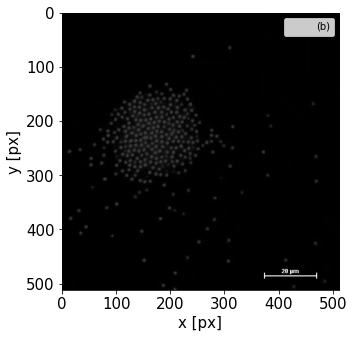

In [2]:
fig = plt.figure(figsize=(6.4,5.1))
plt.xlabel("x [px]",fontsize=15)
plt.ylabel("y [px]", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.imshow(processed_video[12]) #number is the frame number, can change to another frame
fig.savefig("Video_frame_12.pdf", bbox_inches='tight')
fig.savefig("Video_frame_12.png", bbox_inches='tight')

#image=(plt.imshow('MicroscoftTeams-image.png'))

f_1 = tp.locate(processed_video[12], 21,  minmass=300, invert=False, percentile=75, separation=5) 
#start with "21", minmass, and invert to tune particles in system. If these don't sufficiently locate particles, add percentile and separation
#21=diameter parameter, has to be an odd number
#minmass=minimum integrated brightness eliminates spurious feacture, can be any float number
#invert=True is features are darker than background, otherwise True=False. False is the default
#percentile=further excludes particles that are darker than the pixels withing the chosen percentile
#seaparation=sets the minimum separation between features
#located features can be seen in next code block.
f_1

0       65.259287
1       81.344915
2      132.496124
3      135.916213
4      142.108849
          ...    
253    485.200329
257    485.526975
254    485.528253
259    495.513872
260    502.810135
Name: y, Length: 261, dtype: float64


261

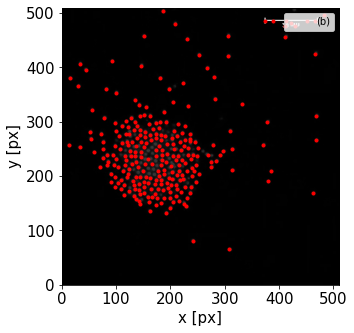

In [4]:
#plots located points on top of frame to view particle selection
a=f_1.sort_values(by=['y'])
fig = plt.figure(figsize=(6.4,5.1))
plt.imshow(processed_video[12], cmap='gray')
plt.xlabel('x [px]')
plt.ylabel('y [px]')
plt.xlim((0,510)) #adjust for window size
plt.ylim((0,510)) #adjust for window size
plt.plot(a['x'][0:],a['y'][0:], 'r.')
plt.xlabel("x [px]",fontsize=15)
plt.ylabel("y [px]", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

   

fig.savefig('located_particles.pdf',bbox_inches='tight')
fig.savefig('located_particles.png',bbox_inches='tight')
print(a['y'][0:])
len(a['y'][0:])

In [5]:
import numba
#puts particles into cordinates and stores in an hdf file. 
#tuning has to be the same as above 
#can take awhile to run through each frame and feature
#glitches if run with same file name too many times. May need to switch file name if it stops working.

t = tp.batch(processed_video, 21, minmass=300, percentile=75,separation=5, invert=False, engine='numba', characterize=True, output= tp.PandasHDFStore('particle_features.h6', mode='a', t_column='frame'))



Frame 81: 233 features


In [6]:
#imports hdf file 
import h5py
with h5py.File('particle_features.h6', "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])



Keys: <KeysViewHDF5 ['Frame_0', 'Frame_1', 'Frame_10', 'Frame_11', 'Frame_12', 'Frame_13', 'Frame_14', 'Frame_15', 'Frame_16', 'Frame_17', 'Frame_18', 'Frame_19', 'Frame_2', 'Frame_20', 'Frame_21', 'Frame_22', 'Frame_23', 'Frame_24', 'Frame_25', 'Frame_26', 'Frame_27', 'Frame_28', 'Frame_29', 'Frame_3', 'Frame_30', 'Frame_31', 'Frame_32', 'Frame_33', 'Frame_34', 'Frame_35', 'Frame_36', 'Frame_37', 'Frame_38', 'Frame_39', 'Frame_4', 'Frame_40', 'Frame_41', 'Frame_42', 'Frame_43', 'Frame_44', 'Frame_45', 'Frame_46', 'Frame_47', 'Frame_48', 'Frame_49', 'Frame_5', 'Frame_50', 'Frame_51', 'Frame_52', 'Frame_53', 'Frame_54', 'Frame_55', 'Frame_56', 'Frame_57', 'Frame_58', 'Frame_59', 'Frame_6', 'Frame_60', 'Frame_61', 'Frame_62', 'Frame_63', 'Frame_64', 'Frame_65', 'Frame_66', 'Frame_67', 'Frame_68', 'Frame_69', 'Frame_7', 'Frame_70', 'Frame_71', 'Frame_72', 'Frame_73', 'Frame_74', 'Frame_75', 'Frame_76', 'Frame_77', 'Frame_78', 'Frame_79', 'Frame_8', 'Frame_80', 'Frame_81', 'Frame_9']>


82
233


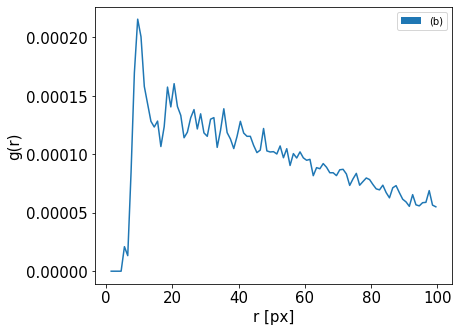

In [7]:
#Pair Correlation/ Radial Distribution
#code recieved from https://stackoverflow.com/questions/59236066/python-calculation-of-lennardjones-2d-interaction-pair-correlation-distribution
from scipy.spatial.distance import *

L=len(processed_video) #number of frames
print(L)
for x in range(0,L):
    Frame='Frame_'+str(x)
    hdf=pd.read_hdf('particle_features.h6', key=Frame)
    df=pd.DataFrame(hdf)
    features = ['x','y']
    hdf_alter= df.loc[:,features].values
    N=len(hdf_alter)
    

def distmatrix(posarray):
    return cdist(posarray, posarray, 'euclidean')

N=len(hdf_alter) #number of particles 
print(N)

dist = distmatrix(hdf_alter)


def RDF(N,particles, L):
    minb=1 
    maxb=100 # adjust to tune bin max
    nbin=100 # adjust to tune number of bins
    width=(maxb-minb)/(nbin)
    rings=np.linspace(minb, maxb,nbin)
    skata=np.asarray(dist).flatten()
    rDf = np.histogram(skata, rings ,density=True)
    prefactor = (1/( np.pi*(L**2/N**2)))
    rDf = [prefactor*rDf[0], 0.5*(rDf[1][1:]+rDf[1][:-1])]
    rDf[0]=np.multiply(rDf[0],1/(rDf[1]*( width )))
    
    fig = plt.figure(figsize=(6.4,5.1))
    plt.plot(rDf[1],rDf[0])
    plt.xlabel("r [px]",fontsize=15)
    plt.ylabel("g(r)", fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    import matplotlib.patches as mpatches
       

    plt.show()
    fig.savefig('pair_correlation_plot.pdf', bbox_inches='tight')
    fig.savefig('pair_correlation_plot.png', bbox_inches='tight')
    return rDf

rDf=RDF(N, dist, 200)
 

<ipython-input-8-63fdf35e1059>:1: RuntimeWarning: divide by zero encountered in log
  DG=np.log(100000*rDf[0])*(-8.314*300)/1000 #KJ/mol


-4.998654985208744

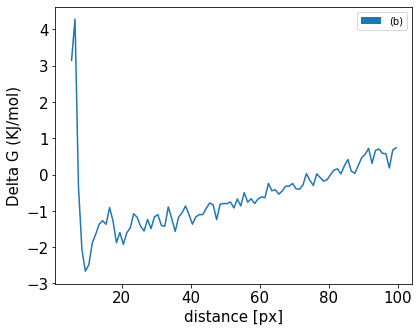

In [8]:
#pair potential of mean force/free energy 
DG=np.log(100000*rDf[0])*(-8.314*300)/1000 #KJ/mol
fig = plt.figure(figsize=(6.4,5.1))
plt.plot(rDf[1],DG-np.mean(DG[-20]))
plt.xlabel("distance [px]",fontsize=15)
plt.ylabel("\Delta G (KJ/mol)", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
import matplotlib.patches as mpatches
    

fig.savefig('pair_potential_of_mean_force.pdf', bbox_inches='tight')
fig.savefig('pair_potential_of_mean_force.png', bbox_inches='tight')
np.mean(DG[-20])
 

L
82
hdf_alter
[[240.38161209  81.09760705]
 [190.77204659 137.06489185]
 [206.9517663  136.82744565]
 [167.87518911 138.28971256]
 [154.13389441 145.14384086]
 [132.01784121 146.04460303]
 [188.01834862 144.61060143]
 [162.47575058 148.26558891]
 [142.38722966 152.45211123]
 [179.49484536 151.20189003]
 [219.28215121 150.71628995]
 [169.91347905 154.43351548]
 [204.48663854 154.70182841]
 [145.018      159.38      ]
 [214.55791506 160.38127413]
 [125.58712943 162.56254519]
 [225.57020364 163.44908896]
 [200.09201213 164.21435794]
 [137.3024055  164.6884307 ]
 [165.73543124 165.23892774]
 [157.24725275 166.35164835]
 [190.46613995 166.48194131]
 [238.3668513  166.33446954]
 [175.02782931 167.42857143]
 [147.59009394 166.74551665]
 [212.97493036 170.44846797]
 [127.14807692 170.60384615]
 [184.46358974 170.7374359 ]
 [221.75092025 169.58895706]
 [202.6339381  171.9733191 ]
 [116.83480454 173.52837327]
 [173.4086781  174.60847629]
 [141.61493582 176.87631272]
 [151.79171333 178.28667413]

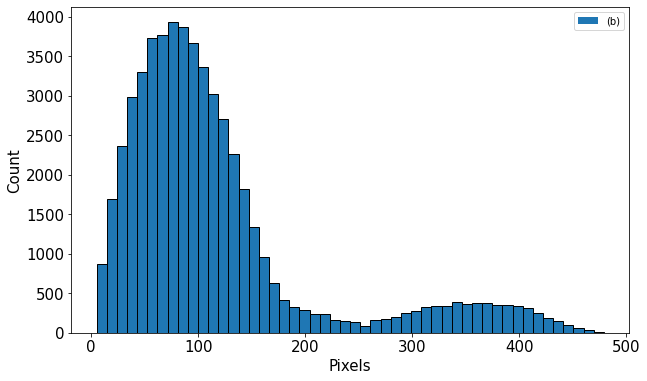

In [9]:
#Pair Distances
L=len(processed_video)
print('L')
print(L)
for x in range(0,L):
    Frame='Frame_'+str(x)
    #print(Frame)
    hdf=pd.read_hdf('particle_features.h6', key=Frame)
    #print(hdf)
    df=pd.DataFrame(hdf)
    features = ['x','y']
    hdf_alter= df.loc[:,features].values
print('hdf_alter')
print(hdf_alter)

c=cdist(hdf_alter, hdf_alter, 'euclidean')
print('c')
print(c)

fig, ax=plt.subplots()
ax.hist(c[np.nonzero(c)], bins=50, edgecolor='black')
plt.xlabel("Pixels",fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
import matplotlib.patches as mpatches
    

fig.savefig('pair_distance_histogram.pdf', bbox_inches='tight')
fig.savefig('pair_distance_histogram.png', bbox_inches='tight')


In [10]:
#triplet distance calcs
c=cdist(hdf_alter, hdf_alter, 'euclidean')
print('c')
print(c)
from numba import jit

@jit
def trip(N,c):
    storage=np.zeros((700000000))
    counter=0


    for i in range (0,N):
        #if c[i][j]<20
        for j in range (i+1,N):
            #if c[i][k]<20
            for k in range (j+1,N):
                #d_t= dij+dik+djk#
                storage[counter]= c[i][j]+c[i][k]+c[j][k]
                counter=counter+1
                if counter%1000000 == 0:
                    print(counter, i, j, k)
    return storage
storage= trip(N,c)
print('STORAGE')
print(storage)

dat=storage


c
[[  0.          74.78934387  64.98745648 ... 438.62419172 439.79844608
  463.17853581]
 [ 74.78934387   0.          16.18146195 ... 412.08341059 415.04209164
  444.24636788]
 [ 64.98745648  16.18146195   0.         ... 403.83730594 406.43602749
  434.57071337]
 ...
 [438.62419172 412.08341059 403.83730594 ...   0.          11.02209051
   54.85864049]
 [439.79844608 415.04209164 406.43602749 ...  11.02209051   0.
   44.50850964]
 [463.17853581 444.24636788 434.57071337 ...  54.85864049  44.50850964
    0.        ]]
1000000 45 100 167
2000000 153 168 171
STORAGE
[155.9582623  190.06674918 219.73478706 ...   0.           0.
   0.        ]


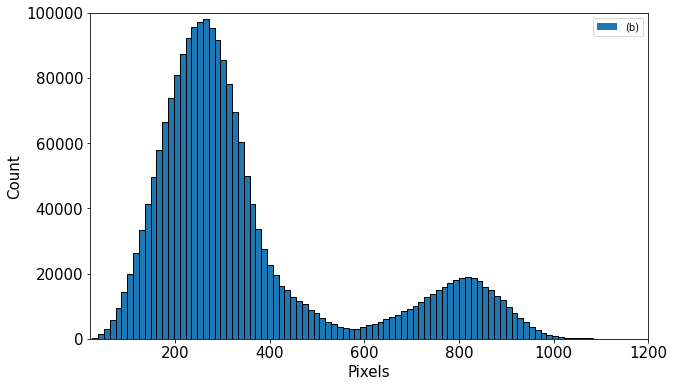

In [11]:
#triplet distance histogram
fig, ax=plt.subplots()
ax.hist(storage, bins =100, edgecolor="black")
plt.xlabel("Pixels",fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
import matplotlib.patches as mpatches

ax.set_ylim([0,100000])
ax.set_xlim([20,1200])
fig.savefig('triplet_distance_histogram.pdf', bbox_inches='tight')
fig.savefig('triplet_distance_histogram.png', bbox_inches='tight')


c
[[  0.          74.78934387  64.98745648 ... 438.62419172 439.79844608
  463.17853581]
 [ 74.78934387   0.          16.18146195 ... 412.08341059 415.04209164
  444.24636788]
 [ 64.98745648  16.18146195   0.         ... 403.83730594 406.43602749
  434.57071337]
 ...
 [438.62419172 412.08341059 403.83730594 ...   0.          11.02209051
   54.85864049]
 [439.79844608 415.04209164 406.43602749 ...  11.02209051   0.
   44.50850964]
 [463.17853581 444.24636788 434.57071337 ...  54.85864049  44.50850964
    0.        ]]


<ipython-input-12-411192a77ff8>:8: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "genhistogram" failed type inference due to: No implementation of function Function(<function append at 0x00000215F3D764C0>) found for signature:
 
 >>> append(array(int64, 2d, C), list(list(float64)), axis=Literal[int](0))
 
There are 2 candidate implementations:
     - Of which 1 did not match due to:
     Overload in function 'np_append': File: numba\np\arrayobj.py: Line 1709.
       With argument(s): '(array(int64, 2d, C), list(list(float64)), axis=Literal[int](0))':
      Rejected as the implementation raised a specific error:
        TypingError: Failed in nopython mode pipeline (step: nopython frontend)
      No implementation of function Function(<function concatenate at 0x00000215F3BDB040>) found for signature:
       
       >>> concatenate(Tuple(array(int64, 2d, C), list(list(float64))), axis=Literal[int](0))
       
      There are 2 candida

C:\Users\flipp\anaconda3\lib\site-packages\numba\core\object_mode_passes.py:177: NumbaWarning: Function "genhistogram" was compiled in object mode without forceobj=True.

File "<ipython-input-12-411192a77ff8>", line 19:
def genhistogram(N,c,b):
    <source elided>

    for i in range (0,N):
    ^

  warnings.warn(errors.NumbaWarning(warn_msg,
C:\Users\flipp\anaconda3\lib\site-packages\numba\core\object_mode_passes.py:187: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit

File "<ipython-input-12-411192a77ff8>", line 19:
def genhistogram(N,c,b):
    <source elided>

    for i in range (0,N):
    ^

  warnings.warn(errors.NumbaDeprecationWarning(msg,


STORAGE 2
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 1. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 1. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


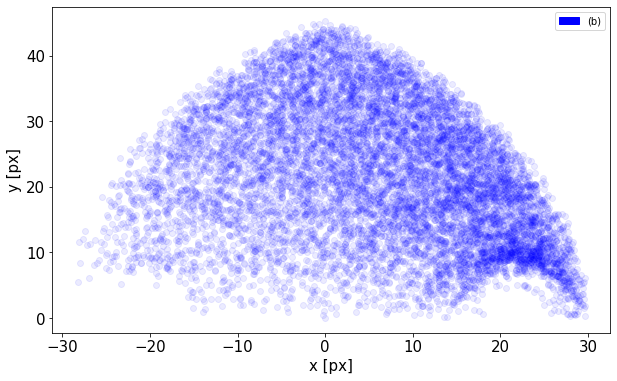

In [12]:
#Triangle Distribution and triplet correlation
#takes awhile to run, especially as data points increase
c=cdist(hdf_alter, hdf_alter, 'euclidean')
print('c')
print(c)
from numba import jit
b= 100 #number of bins

@jit
def genhistogram(N,c,b):
    storage=np.zeros((b,b,b))
    storage3=np.zeros((4*b))
    storage4=np.array([[0,0]])
    counter=0
    bmin= 0
    bmax= 50 #based off of pixels 
    bwidth= (bmax-bmin)/b


    for i in range (0,N):
        for j in range (i+1,N):
            if c[i][j]<bmax and c[i][j]>1:
                for k in range (j+1,N):
                    if c[i][k]<bmax and c[j][k]<bmax and c[i][k]>1 and c[j][k]>1:
                        #d_t= dij+dik+djk#
                        l = np.floor((c[i][j]-bmin)/bwidth) 
                        m = np.floor((c[i][k]-bmin)/bwidth)
                        n = np.floor((c[j][k]-bmin)/bwidth)
                        r = c[i][j]
                        s = c[i][k]
                        t = c[j][k]
                        o = np.floor(((r + s + t)-bmin)/bwidth)
                        dV=8*np.pi**2*(bwidth**3)*r*s*t
                        storage3[np.int(o)] = storage3[np.int(o)] + (1/dV)
                        x = (t**2-s**2)/(-2*r) #centered on origin for length r 
                        y = np.sqrt(s**2-(x+(r/2))**2)
                        if r>40 and r<60: #pixel range for r and be changed as needed/wanted
                            #creates triangle distribution                            
                            storage4=np.append(storage4,[[x,y]], axis=0)
                        storage[np.int(l)][np.int(m)][np.int(n)]= storage[np.int(l)][np.int(m)][np.int(n)] + 1   
                        counter=counter+1
    return storage, storage3, storage4
storage2,storage3, storage4= genhistogram(N,c,b)
print('STORAGE 2')
print(storage2)
print('Storage 3')
print(storage3)

#Triangle distribution plot
plt.plot(storage4[:,0],storage4[:,1], "bo", alpha=0.08) #alpha is transparancy and adjust r range
plt.xlabel("x [px]",fontsize=15)
plt.ylabel("y [px]", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
import matplotlib.patches as mpatches

plt.savefig('Triangle_distribution_plot.png', bbox_inches='tight')
plt.savefig('Triangle_distribution_plot.pdf', bbox_inches='tight')


plt.show()

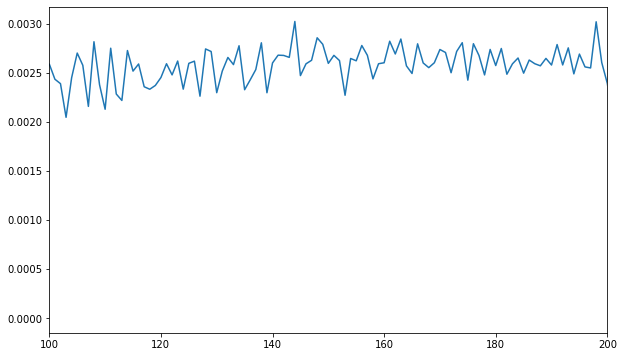

In [13]:
#triplet correlation plot
plt.plot(storage3)
plt.savefig('triplet_correlation_plot.pdf', bbox_inches='tight')

plt.show()


<ipython-input-14-ab998c97cdb2>:3: RuntimeWarning: divide by zero encountered in log
  Free_Energy=(-R*T*np.log(storage3)) - 15000 #J/mol


400


<function matplotlib.pyplot.show(*args, **kw)>

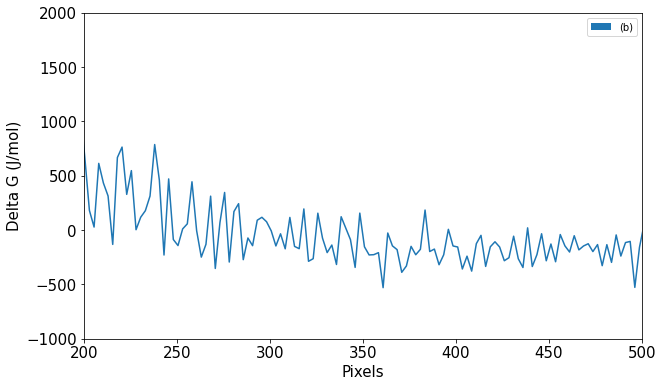

In [14]:
#triplet potential of mean force/free energy
R=8.314 #J/Kmol, ideal gas constant
T=300 #K, Standard Air Temp, Change if you know the temp of your colloidal solution
Free_Energy=(-R*T*np.log(storage3)) - 15000 #J/mol, shift down to center around 0
N=len(Free_Energy)
print(N)
x= np.linspace(0, N*2.5,N)
plt.plot(x, Free_Energy)


plt.xlim([200,500]) #adjust based on system
plt.ylim([-1000,2000]) #adjust based on system
plt.xlabel("Pixels",fontsize=15)
plt.ylabel("\Delta G (J/mol)", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)




plt.savefig('Triplet_potential_of_mean_force.pdf', bbox_inches='tight')
plt.savefig('Triplet_potential_of_mean_force.png', bbox_inches='tight')
plt.show


Frame 81: 233 trajectories present.


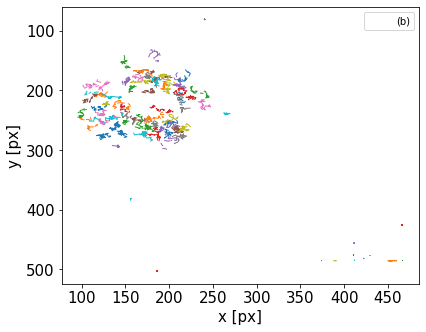

,12,37,49,68,77,80,81,84,85,86,...,2531,2539,2565,2576,2585,2612,2619,2636,2770,2855
lag time [s],,,,,,,,,,,,,,,,,,,,,
0.041667,0.032178,0.027107,0.010500,0.000074,0.000044,1.779520e-08,3.043865e-09,1.231703e-09,0.000445,6.542074e-09,...,0.022482,0.008557,0.031680,0.031084,0.026490,0.042419,0.033356,0.032068,0.025416,0.029584
0.083333,0.068586,0.046577,0.013993,0.000098,0.000064,3.527130e-08,5.549919e-09,2.492925e-09,0.000901,9.452015e-09,...,0.036373,0.010715,0.029981,0.041740,0.048541,0.036727,0.060768,0.051605,0.040779,0.041035
0.125000,0.089115,0.046584,0.014850,0.000121,0.000093,5.348271e-08,5.917840e-09,3.845574e-09,0.001323,1.313117e-08,...,0.067150,0.009661,0.050312,0.067332,0.063586,0.070601,0.123834,0.058536,0.045354,0.066860
0.166667,0.110628,0.076034,0.010414,0.000136,0.000113,7.709343e-08,4.073603e-09,5.233466e-09,0.001756,1.695503e-08,...,0.073372,0.008980,0.058800,0.074698,0.077983,0.084288,0.174968,0.080484,0.050388,0.081927
0.208333,0.133832,0.091953,0.011477,0.000142,0.000130,8.987168e-08,3.724345e-09,5.957214e-09,0.002201,2.032751e-08,...,0.086586,0.010143,0.070642,0.078759,0.090530,0.117471,0.208537,0.096477,0.060300,0.096109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.208333,1.449366,NaN,0.037372,0.000433,0.000229,2.310380e-06,2.610814e-08,2.623274e-08,0.025339,3.810694e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.250000,1.592374,NaN,0.031809,0.000425,0.000222,2.542499e-06,1.938315e-08,2.017566e-08,0.023554,3.996865e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.291667,1.859676,NaN,0.083076,0.000543,0.000277,2.603491e-06,2.045878e-08,1.717747e-08,0.020563,4.279768e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#trajectories
import numba
p = tp.batch(processed_video, 15, minmass=300, invert=False,percentile=75, separation=5, engine='numba', characterize=True)
#tuning same as previously
s = tp.link_df(p, 5, memory=3)
#adjust number in s to account for number of particles. more particles the lower the number
s1 = tp.filter_stubs(s, 25)
fig = plt.figure(figsize=(6.4,5.1))
plt.xlabel("x [px]",fontsize=15)
plt.ylabel("y [px]", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

tp.plot_traj(s1)
fig.savefig('trajectories.pdf', bbox_inches='tight')
fig.savefig('trajectories.png', bbox_inches='tight')
im = tp.imsd(s1,1,1) #add mircons per pixel and frames per second scale here if you know it 
im

lagt
0.041667    0.613398
0.083333    1.029303
0.125000    1.349772
0.166667    1.718024
0.208333    2.078602
              ...   
3.208333    7.227644
3.250000    4.480102
3.291667    3.511343
3.333333    4.176841
3.375000    4.770178
Name: msd, Length: 81, dtype: float64

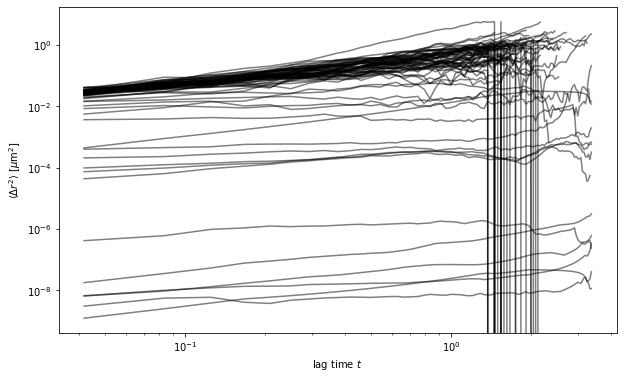

In [16]:
fig, ax = plt.subplots()
ax.plot(im.index, im, 'k-', alpha=0.5)  # black lines, semitransparent
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set_xscale('log')
ax.set_yscale('log')
em = tp.emsd(s1,1,1) #add mircons per pixel and frames per second scale here if you know it 
em

lagt
0.083333     1.029303
0.125000     1.349772
0.166667     1.718024
0.208333     2.078602
0.250000     2.459316
0.291667     2.852389
0.333333     3.145735
0.375000     3.553528
0.416667     3.894112
0.458333     4.329792
0.500000     4.743284
0.541667     5.160646
0.583333     5.533398
0.625000     5.940733
0.666667     6.244655
0.708333     6.594649
0.750000     7.034321
0.791667     7.630279
0.833333     7.981908
0.875000     8.551252
0.916667     8.905101
0.958333     9.355696
1.000000     9.547423
1.041667    10.016736
1.083333    10.522683
1.125000    11.208607
1.166667    11.608210
1.208333    11.725200
1.250000    12.357139
Name: msd, dtype: float64


[Text(0, 0.5, '$\\langle \\Delta r^2 \\rangle$ [$\\mu$m$^2$]'),
 Text(0.5, 0, 'lag time $t$')]

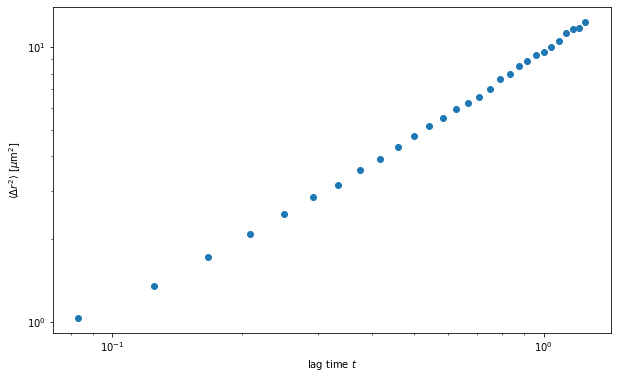

In [17]:
fig, ax = plt.subplots()
ax.plot(em.index, em, 'o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
#only use commented code if noisy points need to be removed
#uncomment to use
#em1=em.iloc[1:30]
#print(em1)
#len(em1)
#fig, ax = plt.subplots()
#ax.plot(em1.index, em1, 'o')
#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
 #      xlabel='lag time $t$')



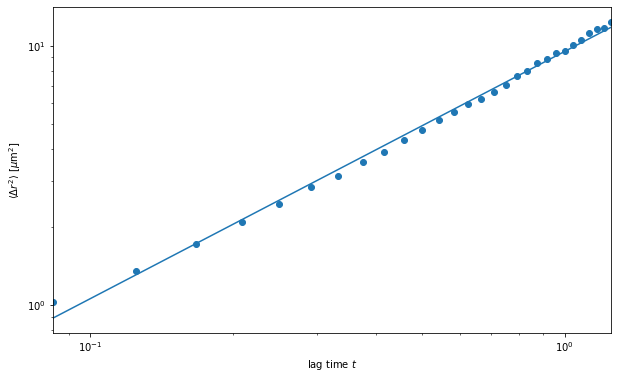

,n,A
msd,0.953256,9.494735


In [18]:
plt.figure()
plt.ylabel(r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]')
plt.xlabel('lag time $t$');

tp.utils.fit_powerlaw(em)


#A=4D, D can be found on trackpy walkthrough 
#http://soft-matter.github.io/trackpy/dev/tutorial/walkthrough.html
